# Assignment 6
## Shashank Siripragada


### How to model throwing a die with data science? Is that a perfectly random event, or not? What is the histogram that matches the experiment? Build a model (i.e. its histogram)


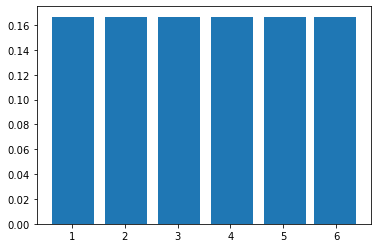

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x = [1, 2, 3, 4, 5, 6]

counts, bins = np.histogram(x, bins=100)

bins = bins[:-1] + (bins[1] - bins[0])/2

probs = counts/float(counts.sum())

plt.bar(bins, probs)

plt.show()

The answer simply on how we define "Random". In a very broad sense, random is just something that is unpredictable. A fair die throw, then, is sufficiently random. To apply a more strict definition of random, an event is perfectly random when the probability of all the possible outcomes is equal.

(0.0, 1.0)

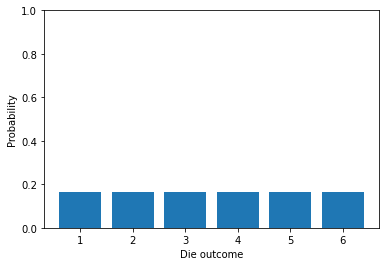

In [3]:
probs = np.full((6), 1/6)
face = [1,2,3,4,5,6]
#print(probs)

plt.bar(face, probs)

plt.ylabel('Probability')
plt.xlabel('Die outcome')
axes =  plt.gca()
axes.set_ylim([0,1])

### Then build a randomly weighted die (i.e. the histogram of a die that produces numbers with random probabilities)

##### We consider np.random.random(6) to give us random outcomes each time. Running this cell multiple times gives us different distribution each time.

[0.09712086 0.28153577 0.28700241 0.23368864 0.01863078 0.08202154]


(0.0, 1.0)

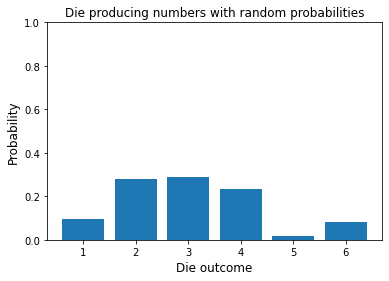

In [83]:
probs = np.random.random(6)
probs /= probs.sum()
print(probs)

face = [1,2,3,4,5,6]
#print(probs)

plt.bar(face, probs)

plt.title('Die producing numbers with random probabilities', fontsize = 12)
plt.ylabel('Probability',  fontsize = 12)
plt.xlabel('Die outcome',  fontsize = 12)
axes =  plt.gca()
axes.set_ylim([0,1])

### Then build a weighted die that matches a Gaussian distribution instead (in other words, a weighted die with a gaussian-looking histogram).

0.13903801110819647
[0.0175283  0.1295176  0.35206533 0.35206533 0.1295176  0.0175283 ]


(0.0, 1.0)

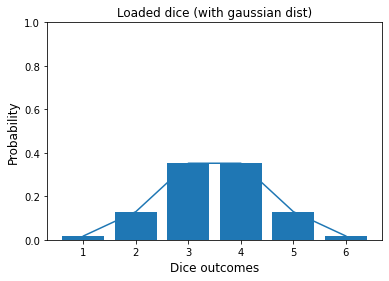

In [5]:
import scipy.stats as stats
n = np.arange(1, 7)
mean = 3.5

gauss_dice = stats.norm.pdf(n, mean)

std_gaussian_dice = np.std(gauss_dice)
print(std_gaussian_dice)
print(gauss_dice)
plt.plot(n, gauss_dice)

face = [1,2,3,4,5,6]
plt.bar(face, gauss_dice)

plt.title('Loaded dice (with gaussian dist)', fontsize = 12)
plt.ylabel('Probability', fontsize=12)
plt.xlabel('Dice outcomes', fontsize=12)
axes = plt.gca()
axes.set_ylim([0,1])


### Build a generative model allowing you to actually roll your gaussian loaded die and generate random variates. Then, generate 100 random variates from it. Plot their histogram. How close does it match the theoretical histogram? 

In [88]:
### Let's reuse the weighted gaussian 

from scipy.stats import norm

n = np.arange(1, 7)
mean = 3.5
gauss_dice = stats.norm.pdf(n, mean)
std_gaussian_dice = np.std(gauss_dice)

face = [1,2,3,4,5,6]

#### Let's build a generative model based on the Gaussian loaded die, which takes the pdf and generates 100 random variates in [1, 2, 3, 4, 5, 6]

In [89]:
pdf = norm.pdf(np.arange(1,7), 3.5)
pdf=pdf/pdf.sum()

'''
This is the generative model which picks die faces [1,2,3,4,5,6] 
given a pdf function and range of values and size of the output. 
'''
data=np.random.choice(np.arange(1,7), size=100, replace=True, p=pdf)

print("The outcomes when we roll the Gaussian loaded die 100 times.\n")
print(data)

counts, bins = np.histogram(data, bins=100)
bins = bins[:-1] + (bins[1] - bins[0])/2
probs = counts/float(counts.sum())


The outcomes when we roll the Gaussian loaded die 100 times.

[4 3 4 3 4 4 5 2 1 2 5 2 3 5 3 3 3 2 4 3 4 2 2 3 2 4 3 2 4 2 5 5 3 5 2 3 4
 3 4 4 3 4 4 4 5 4 3 3 2 4 4 4 5 3 4 4 3 3 3 4 4 4 3 4 3 3 3 3 4 5 4 4 4 2
 3 2 3 3 3 4 4 4 6 4 4 5 3 4 5 3 3 3 5 4 3 3 4 4 2 2]


#### Let's plot the theoretical histogram and the histogram from throwing gaussian die 100 times.

#### We can clearly see there is a mismatch among the theoretical and empirical distributions.

(0.0, 1.0)

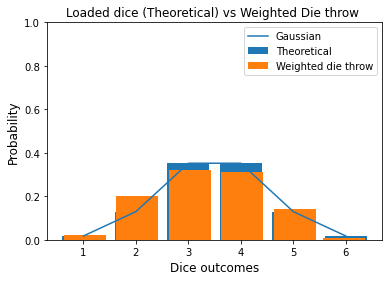

In [82]:
plt.plot(n, gauss_dice)
plt.bar(face, gauss_dice)
plt.bar(bins, probs)
plt.title('Loaded dice (Theoretical) vs Weighted Die throw ', fontsize = 12)
plt.ylabel('Probability', fontsize=12)
plt.xlabel('Dice outcomes', fontsize=12)
plt.legend(['Gaussian', 'Theoretical', 'Weighted die throw'])

axes = plt.gca()
axes.set_ylim([0, 1])